In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
import mysql.connector as connection

In [6]:
mydb = connection.connect(host="localhost", port="3306", database="employee_hiring", user="root", passwd="Mini*9247")
cursor = mydb.cursor()
selectquery = "show tables"
cursor.execute(selectquery)
records = cursor.fetchall()
tables = []
for i in records:
    tables.append(i[0])
tab = []
for i in tables:
    tab.append(i[0:3])
cursor = mydb.cursor()
query = 'describe april_2014'
cursor.execute(query)
colu = cursor.fetchall()
col = []
for i in colu:
    col.append(i[0])
df_all = dict()
ctr=0
for i in tab:
    query = 'select * from '+tables[ctr]+';'
    cursor.execute(query)
    df = pd.DataFrame(cursor.fetchall(),columns=col)
    df[df==''] = np.nan
    df_all[i]  = df.copy()
    ctr+=1

In [7]:
df_all["apr"]

,ID,FP,BU Region,Approved,On hold,Sourcing start,Interview start,Interview end,Offered,Filled,Status
0,5222,F,5,2014-03-31,NaN,2014-04-07 00:00:00,2014-04-24 00:00:00,NaN,NaN,NaN,Interview start
1,17359,P,8,2014-03-27,NaN,2014-04-05 00:00:00,2014-04-15 00:00:00,NaN,NaN,NaN,Interview start
2,12968,P,7,2014-04-29,NaN,NaN,NaN,NaN,NaN,NaN,Approved
3,18986,P,13,2014-03-16,NaN,2014-03-22 00:00:00,2014-04-01 00:00:00,2014-04-24 00:00:00,NaN,NaN,Interview end
4,17926,F,97,2014-03-29,NaN,2014-04-07 00:00:00,2014-04-20 00:00:00,NaN,NaN,NaN,Interview start
...,...,...,...,...,...,...,...,...,...,...,...
4890,354,P,23,2014-02-21,NaN,2014-02-28 00:00:00,2014-03-10 00:00:00,2014-04-02 00:00:00,2014-04-10 00:00:00,2014-04-18 00:00:00,Filled
4891,3466,F,23,2014-03-16,NaN,2014-03-22 00:00:00,2014-04-03 00:00:00,2014-04-30 00:00:00,NaN,NaN,Interview end
4892,17767,F,18,2014-03-28,NaN,2014-04-04 00:00:00,2014-04-15 00:00:00,NaN,NaN,NaN,Interview start
4893,13608,F,17,2014-04-03,NaN,2014-04-10 00:00:00,2014-04-21 00:00:00,NaN,NaN,NaN,Interview start


In [8]:
df_of = df_all["apr"][["Offered","Filled"]]
df_of

,Offered,Filled
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
4890,2014-04-10 00:00:00,2014-04-18 00:00:00
4891,NaN,NaN
4892,NaN,NaN
4893,NaN,NaN


In [9]:
tot = 0
df_of.insert(len(df_of.columns.values),"Diff",0)
for i in range(len(df_of)):
    df_of.loc[i,"Offered"] = pd.to_datetime(df_of.loc[i,"Offered"])
    df_of.loc[i,"Filled"] = pd.to_datetime(df_of.loc[i,"Filled"])
    df_of.loc[i,"Diff"] =  (df_of.loc[i,"Filled"] - df_of.loc[i,"Offered"]).days

In [10]:
df_of

,Offered,Filled,Diff
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
4890,2014-04-10 00:00:00,2014-04-18 00:00:00,8.0
4891,NaT,NaT,NaN
4892,NaT,NaT,NaN
4893,NaT,NaT,NaN


In [11]:
df_of["Diff"].sum()

11614.0

In [12]:
df_of.value_counts().sum()

1653

In [13]:
df_of["Diff"].sum()/df_of.value_counts().sum()

7.026013309134906

In [14]:
mydb = connection.connect(host="localhost", port="3306", database="employee_hiring", user="root", passwd="Mini*9247")
cursor = mydb.cursor()
selectquery = "show tables"
cursor.execute(selectquery)
records = cursor.fetchall()
tables = []
for i in records:
    tables.append(i[0])
tab = []
for i in tables:
    tab.append(i[0:3])
cursor = mydb.cursor()
query = 'describe april_2014'
cursor.execute(query)
colu = cursor.fetchall()
col = []
for i in colu:
    col.append(i[0])
df_all = dict()
ctr=0
for i in tab:
    query = 'select * from '+tables[ctr]+';'
    cursor.execute(query)
    df = pd.DataFrame(cursor.fetchall(),columns=col)
    df[df==''] = np.nan
    df_all[i]  = df.copy()
    ctr+=1

In [15]:
month = pd.DataFrame(index=tab,columns=["Average"])
for i in df_all:
    df_of = df_all[i][["Offered","Filled"]]
    ll = df_of.dropna(axis=0,inplace=False)
    if len(ll)==0:
        month.loc[i,"Average"] = 0
        continue
    ll.insert(len(ll.columns),"Diff",0)
    for j in ll.index.values:
        ll.loc[j,"Offered"] = pd.to_datetime(ll.loc[j,"Offered"])
        ll.loc[j,"Filled"] = pd.to_datetime(ll.loc[j,"Filled"])
        ll.loc[j,"Diff"] = (ll.loc[j,"Filled"] - ll.loc[j,"Offered"]).days
    tot = ll["Diff"].sum()
    no = ll["Diff"].count()
    month.loc[i,"Average"] = (tot/no).round(4)

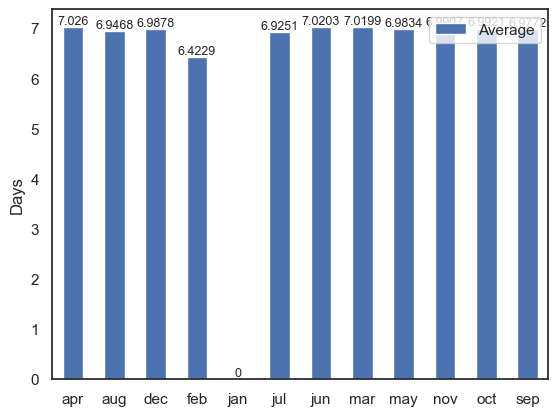

In [16]:
ax2 = month.plot.bar(rot=0,ylabel="Days")
for i in ax2.containers:
    ax2.bar_label(i,fontsize="9")
fig = ax2.get_figure()
fig.savefig("task2.png")

In [22]:
month

,Average
apr,7.026
aug,6.9468
dec,6.9878
feb,6.4229
jan,0
jul,6.9251
jun,7.0203
mar,7.0199
may,6.9834
nov,6.9907


In [25]:
arrFilledjobs = list(month["Average"])
arrFilledjobs

[7.026,
 6.9468,
 6.9878,
 6.4229,
 0,
 6.9251,
 7.0203,
 7.0199,
 6.9834,
 6.9907,
 6.9921,
 6.9772]

In [20]:
def plot_filled_jobs():
    mydb = connection.connect(host="localhost", port="3306", database="employee_hiring", user="root", passwd="Mini*9247")
    cursor = mydb.cursor()
    selectquery = "show tables"
    cursor.execute(selectquery)
    records = cursor.fetchall()
    tables = []
    for i in records:
        tables.append(i[0])
    tab = []
    for i in tables:
        tab.append(i[0:3])
    cursor = mydb.cursor()
    query = 'describe april_2014'
    cursor.execute(query)
    colu = cursor.fetchall()
    col = []
    for i in colu:
        col.append(i[0])
    df_all = dict()
    ctr=0
    for i in tab:
        query = 'select * from '+tables[ctr]+';'
        cursor.execute(query)
        df = pd.DataFrame(cursor.fetchall(),columns=col)
        df[df==''] = np.nan
        df_all[i]  = df.copy()
        ctr+=1
    month = pd.DataFrame(index=tab,columns=["Average"])
    for i in df_all:
        df_of = df_all[i][["Offered","Filled"]]
        ll = df_of.dropna(axis=0,inplace=False)
        if len(ll)==0:
            month.loc[i,"Average"] = 0
            continue
        ll.insert(len(ll.columns),"Diff",0)
        for j in ll.index.values:
            ll.loc[j,"Offered"] = pd.to_datetime(ll.loc[j,"Offered"])
            ll.loc[j,"Filled"] = pd.to_datetime(ll.loc[j,"Filled"])
            ll.loc[j,"Diff"] = (ll.loc[j,"Filled"] - ll.loc[j,"Offered"]).days
        tot = ll["Diff"].sum()
        no = ll["Diff"].count()
        month.loc[i,"Average"] = (tot/no).round(4)
    return 0

In [21]:
plot_filled_jobs()

0